In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# download
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

# load csv
file_path = f"{path}/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

print("Shape:", df.shape)
df.head()


Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

# missing values
print("\nMissing values:\n", df.isnull().sum())

# unique values per column
print("\nUnique values per column:\n", df.nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.dropna(subset=['TotalCharges'], inplace=True)

df.reset_index(drop=True, inplace=True)


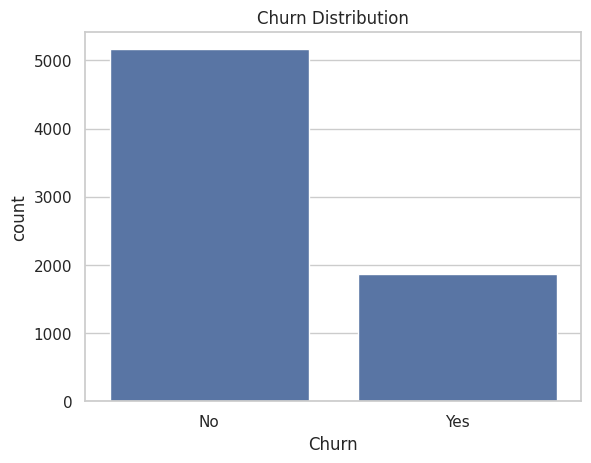

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


In [ ]:
# countplot
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

# percent
print(df['Churn'].value_counts(normalize=True))


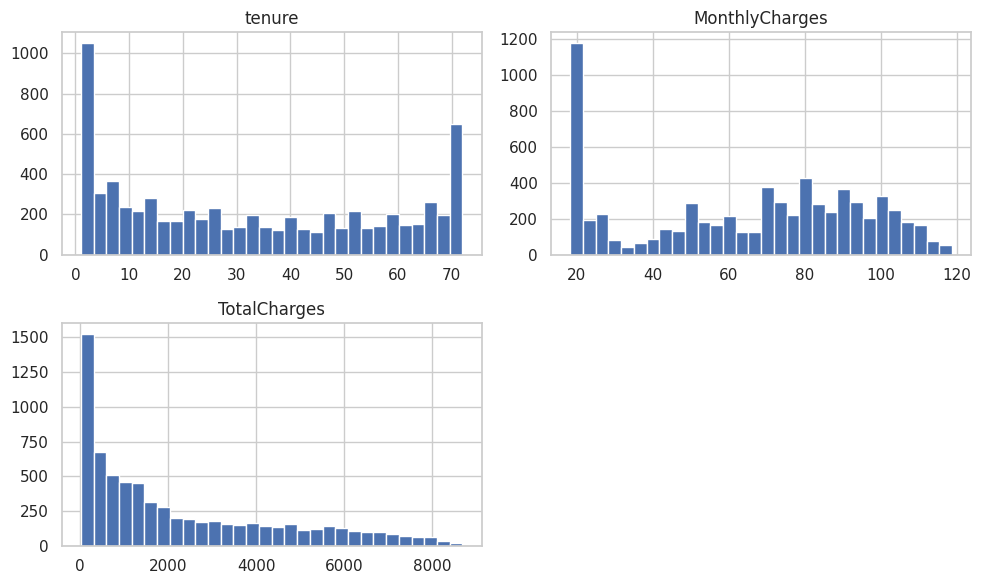

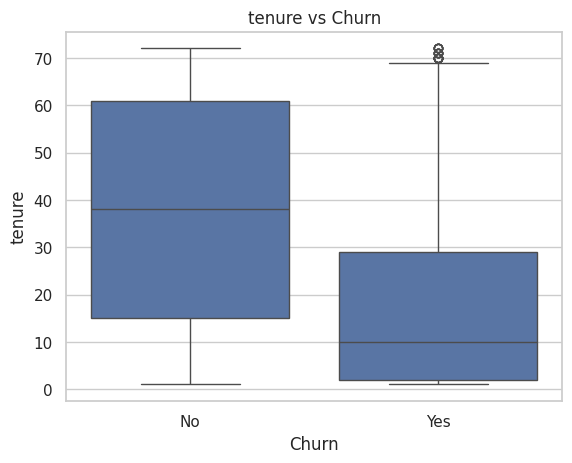

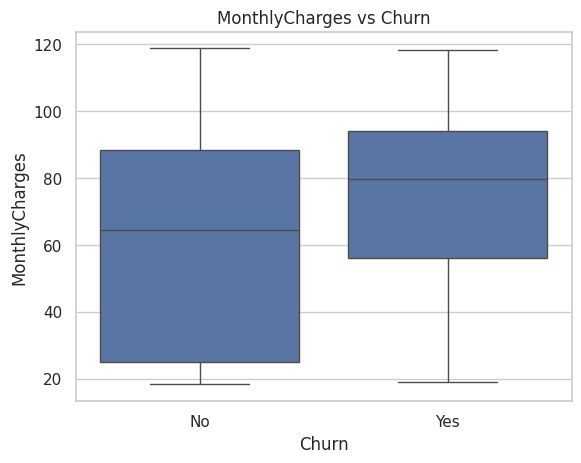

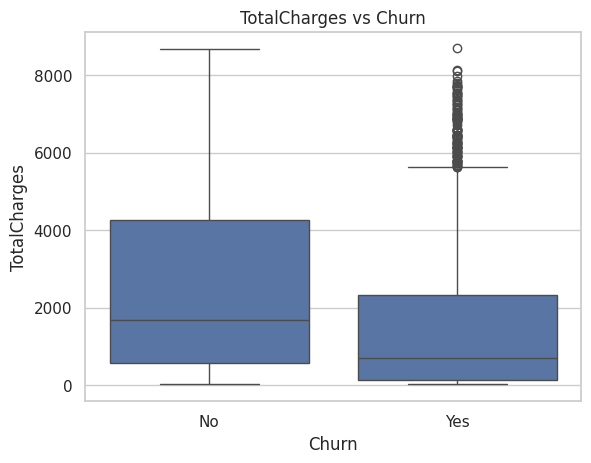

In [ ]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# histograms
df[num_cols].hist(bins=30, figsize=(10, 6))
plt.tight_layout()
plt.show()

# boxplots by churn
for col in num_cols:
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f"{col} vs Churn")
    plt.show()


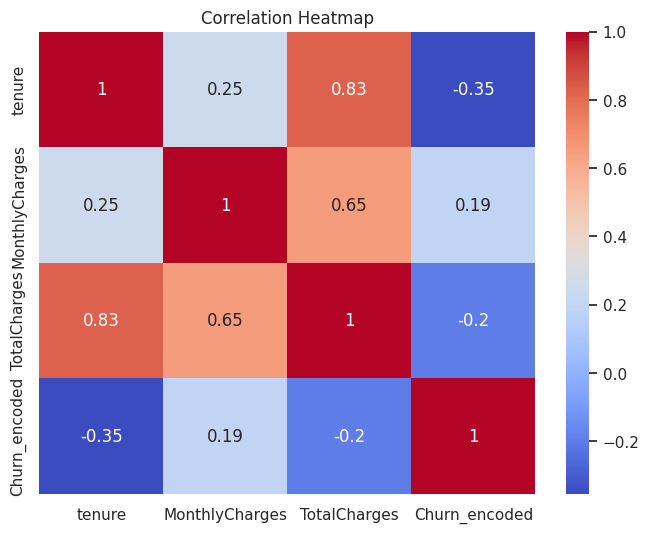

In [ ]:
# encode churn
df['Churn_encoded'] = df['Churn'].map({'Yes': 1, 'No': 0})

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols + ['Churn_encoded']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Churn
No     5163
Yes    1869
Name: count, dtype: int64


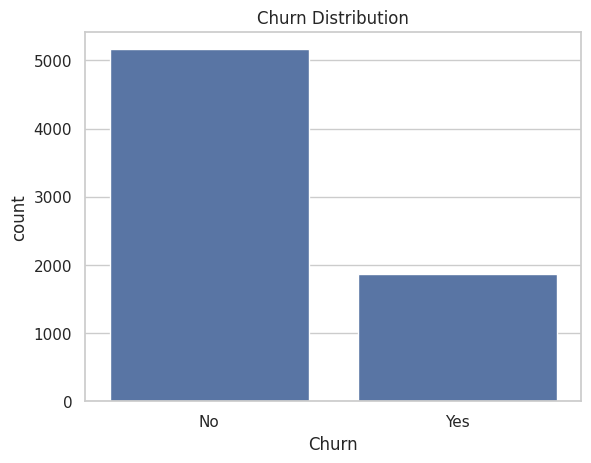

Churn Rate: 0.26578498293515357


In [ ]:
# churn distribution
churn_counts = df['Churn'].value_counts()
print(churn_counts)

sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()

# churn rate
print("Churn Rate:", churn_counts['Yes'] / churn_counts.sum())


tenure: p = 0.0000


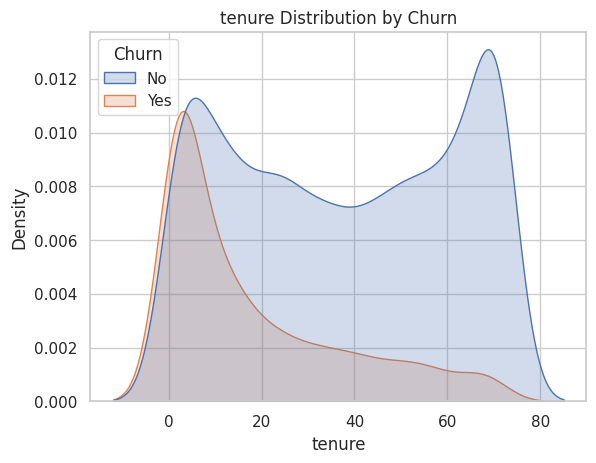

MonthlyCharges: p = 0.0000


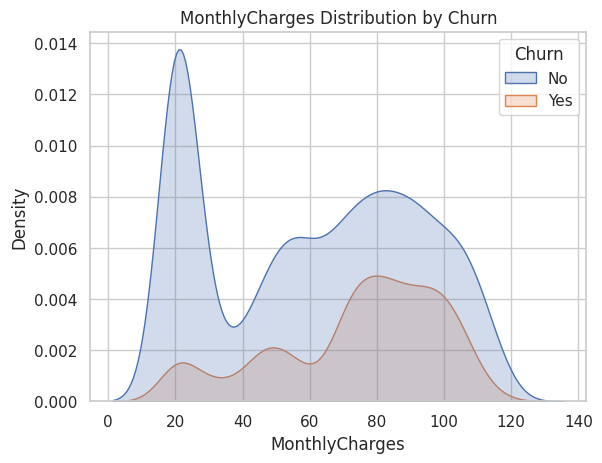

TotalCharges: p = 0.0000


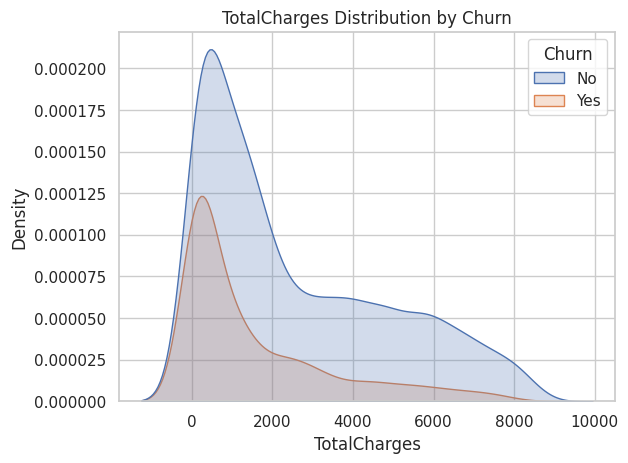

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# t-test for mean differences
for col in num_cols:
    churned = df[df['Churn'] == 'Yes'][col]
    not_churned = df[df['Churn'] == 'No'][col]
    t_stat, p_val = ttest_ind(churned, not_churned)
    print(f"{col}: p = {p_val:.4f}")

    sns.kdeplot(data=df, x=col, hue='Churn', fill=True)
    plt.title(f"{col} Distribution by Churn")
    plt.show()


gender: p = 0.4905


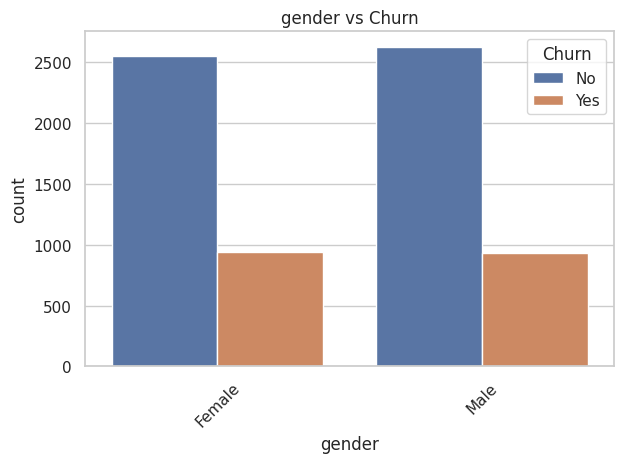

Partner: p = 0.0000


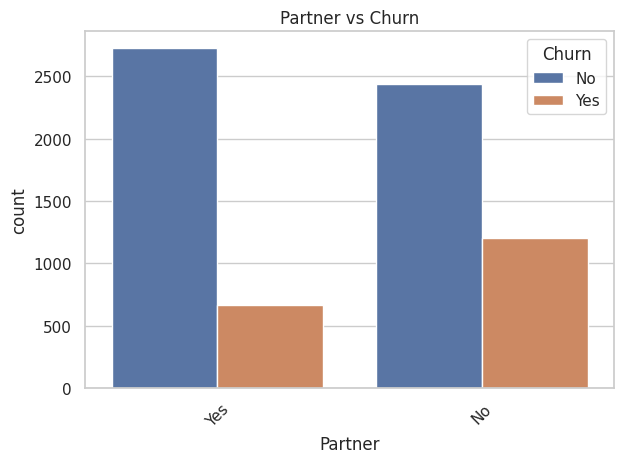

Dependents: p = 0.0000


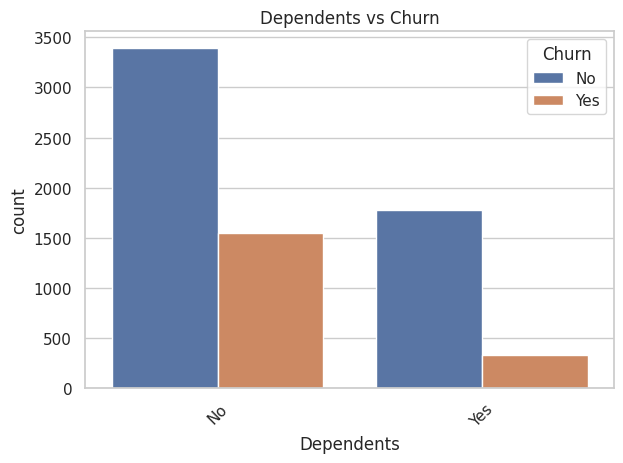

PhoneService: p = 0.3499


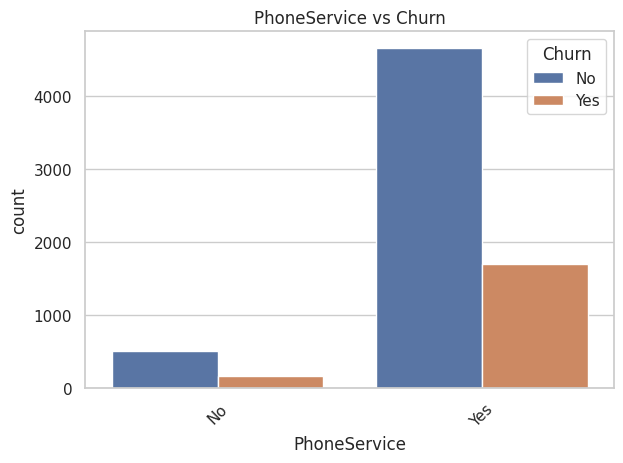

MultipleLines: p = 0.0036


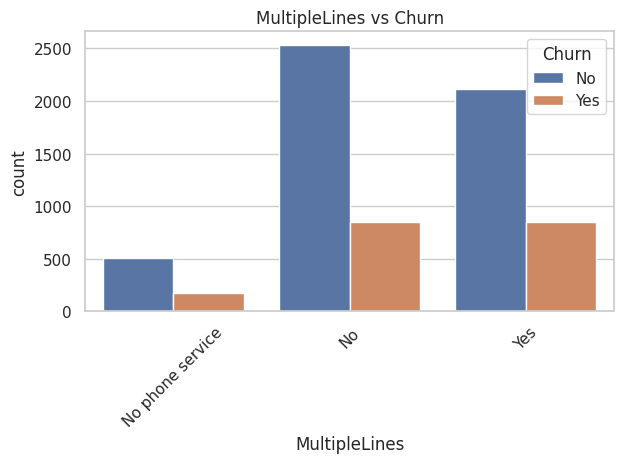

InternetService: p = 0.0000


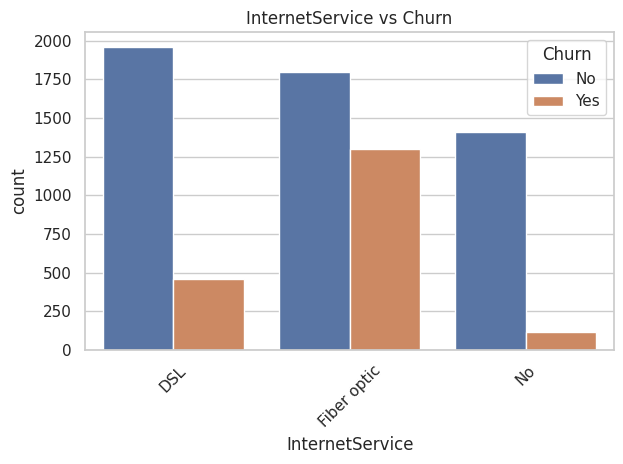

OnlineSecurity: p = 0.0000


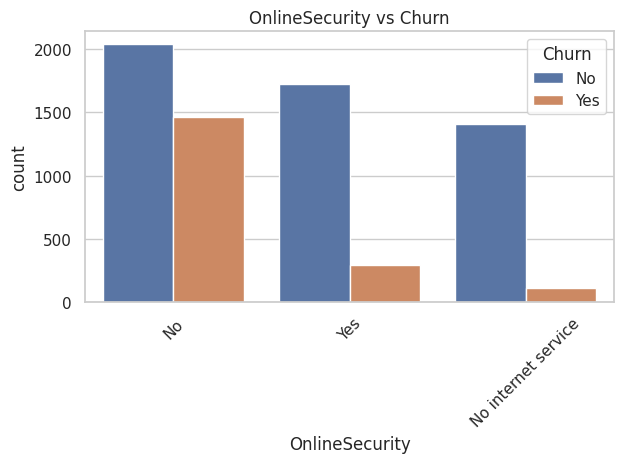

OnlineBackup: p = 0.0000


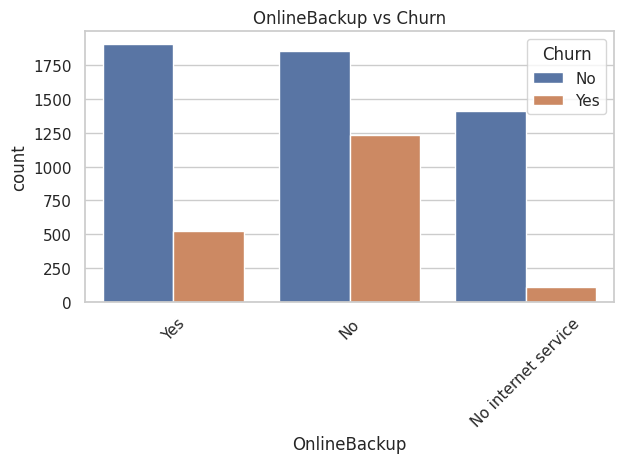

DeviceProtection: p = 0.0000


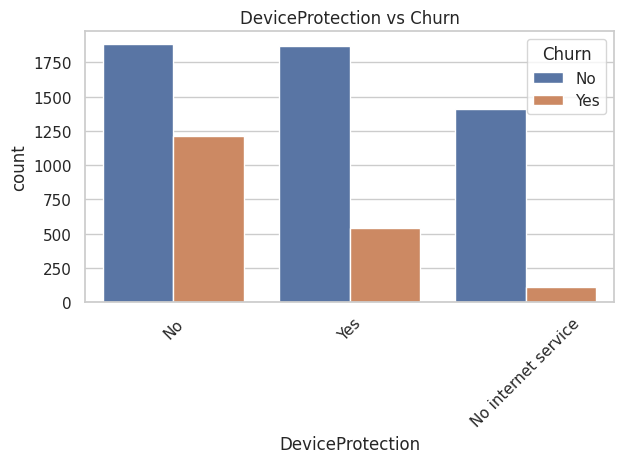

TechSupport: p = 0.0000


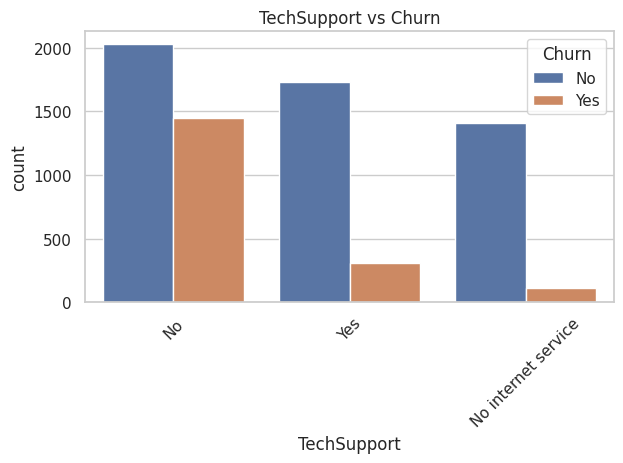

StreamingTV: p = 0.0000


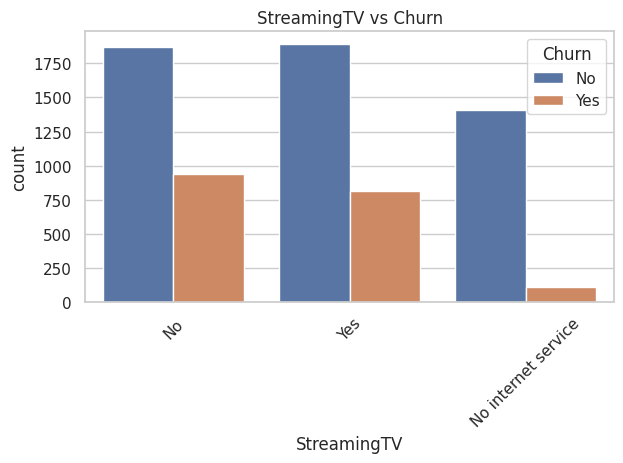

StreamingMovies: p = 0.0000


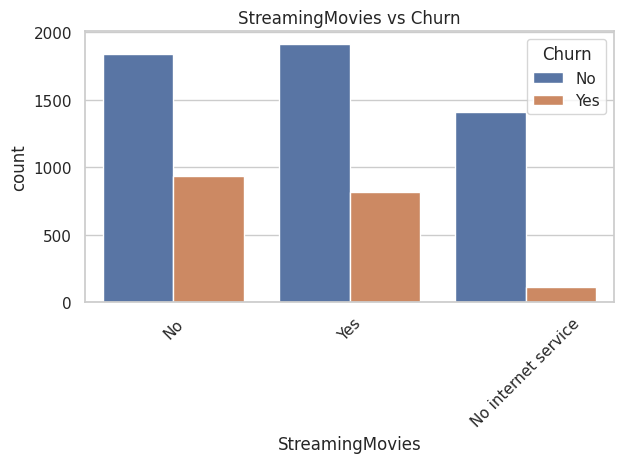

Contract: p = 0.0000


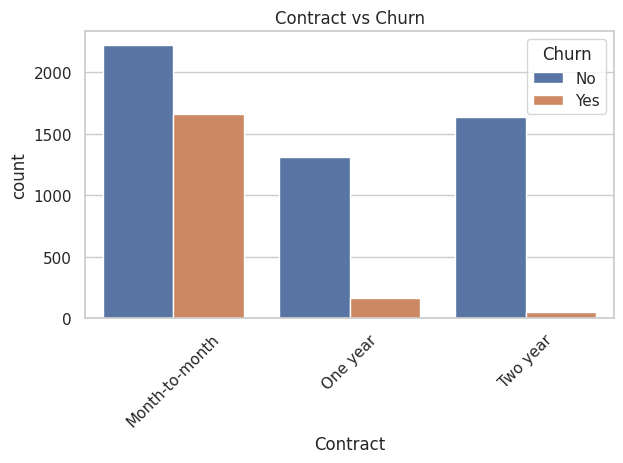

PaperlessBilling: p = 0.0000


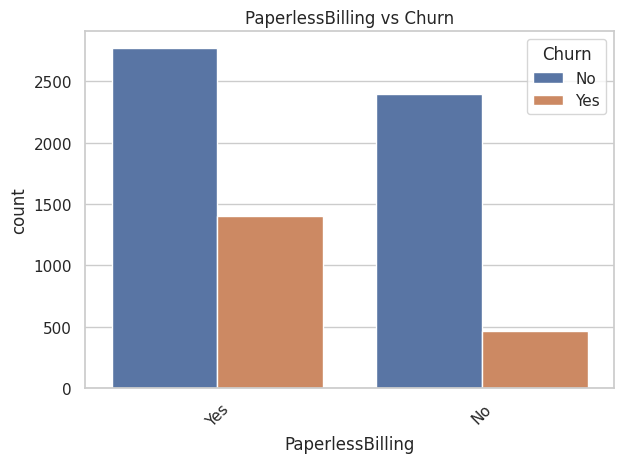

PaymentMethod: p = 0.0000


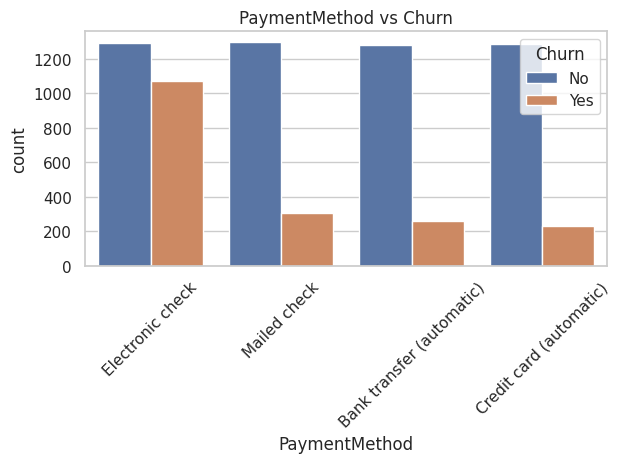

In [ ]:
from scipy.stats import chi2_contingency

cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols.remove('customerID')
cat_cols.remove('Churn')

for col in cat_cols:
    table = pd.crosstab(df[col], df['Churn'])
    chi2, p, _, _ = chi2_contingency(table)
    print(f"{col}: p = {p:.4f}")

    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


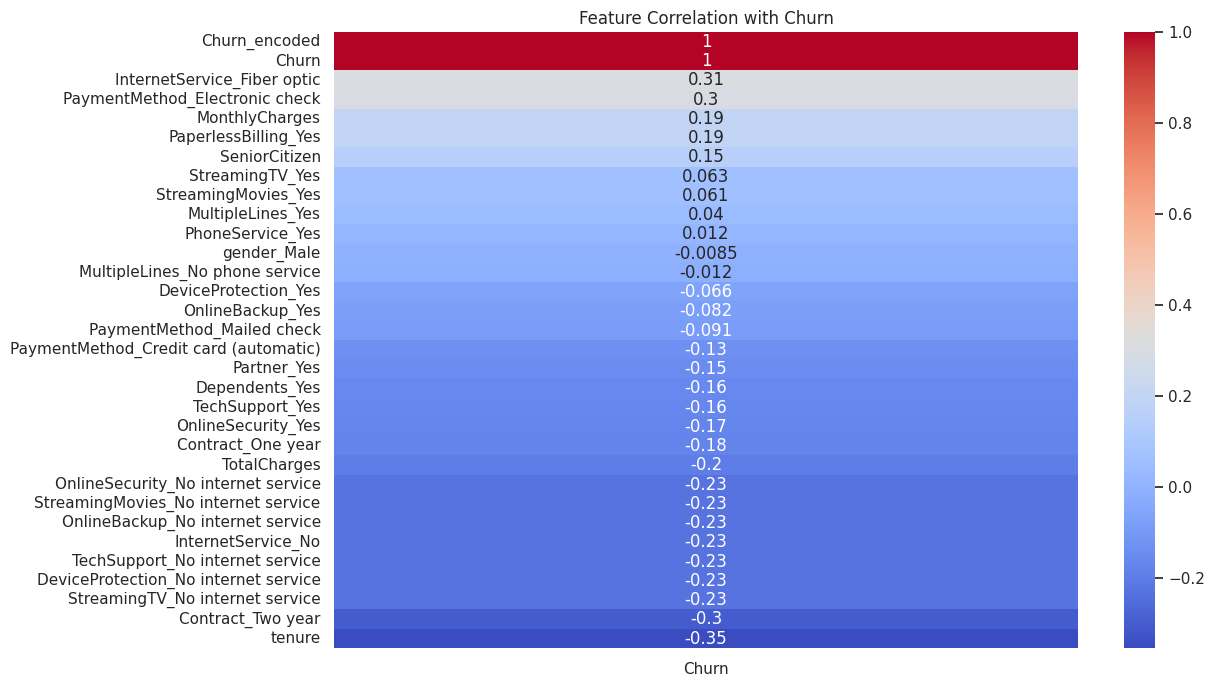

In [ ]:
# one-hot encode categoricals
df_encoded = pd.get_dummies(df.drop(['customerID', 'Churn'], axis=1), drop_first=True)

df_encoded['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# correlation matrix
plt.figure(figsize=(12, 8))
corr = df_encoded.corr()
sns.heatmap(corr[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Churn")
plt.show()


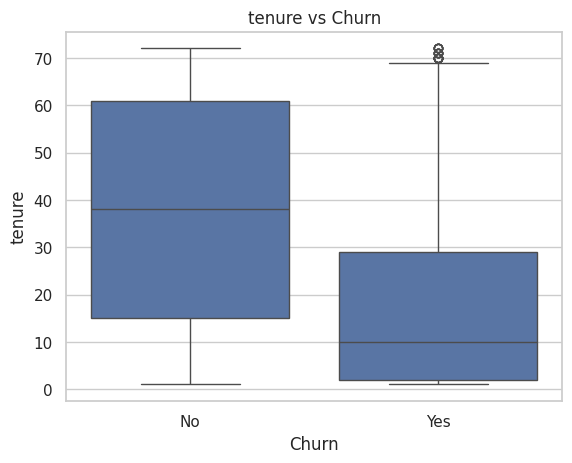

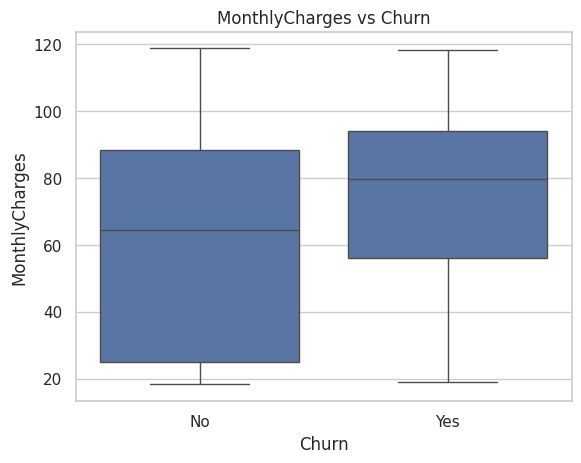

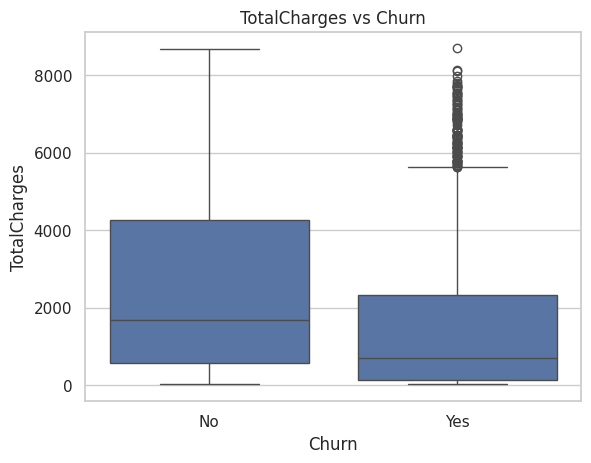

In [ ]:
# check for outliers
for col in num_cols:
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f"{col} vs Churn")
    plt.show()


In [ ]:
# C# of dummies per category column
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} categories")


gender: 2 categories
Partner: 2 categories
Dependents: 2 categories
PhoneService: 2 categories
MultipleLines: 3 categories
InternetService: 3 categories
OnlineSecurity: 3 categories
OnlineBackup: 3 categories
DeviceProtection: 3 categories
TechSupport: 3 categories
StreamingTV: 3 categories
StreamingMovies: 3 categories
Contract: 3 categories
PaperlessBilling: 2 categories
PaymentMethod: 4 categories
